# Pneumonia CNN

A simple project which analyze X-ray images of lungs to determine whether they have pneumonia.

In [11]:
# Définition des transformations
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import sys

sys.path.append("../src")

train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

In [12]:
# Définir les chemins
data_dir = "../../Datasets/chest_xray"

train_data = datasets.ImageFolder(f"{data_dir}/train", transform=train_transforms)
val_data = datasets.ImageFolder(f"{data_dir}/val", transform=val_transforms)
test_data = datasets.ImageFolder(f"{data_dir}/test", transform=val_transforms)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.99215686].


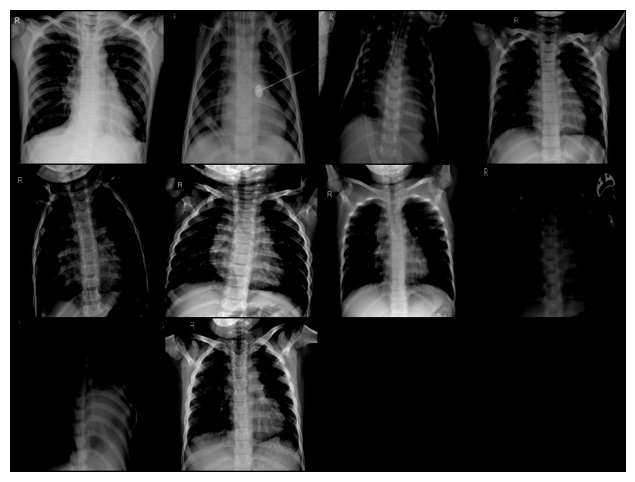

['PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL']


In [13]:
import matplotlib.pyplot as plt
import numpy as np
from torchvision.utils import make_grid

classes = train_data.classes

dataiter = iter(train_loader)
images, labels = next(dataiter)

def imshow(img_tensor):
    img_grid = make_grid(img_tensor, nrow=4, padding=2)
    npimg = img_grid.numpy()
    plt.figure(figsize=(12,6))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

imshow(images[:10])
print([classes[labels[i]] for i in range(4)])

In [14]:
import torch
import torch.nn as nn
from torch import optim

from model import PneumoniaCNN

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = PneumoniaCNN().to(device)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [16]:
epochs = 10

for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device).float().unsqueeze(1)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")

Epoch 1/10, Loss: 0.1969
Epoch 2/10, Loss: 0.0842
Epoch 3/10, Loss: 0.0637
Epoch 4/10, Loss: 0.0482
Epoch 5/10, Loss: 0.0498
Epoch 6/10, Loss: 0.0223
Epoch 7/10, Loss: 0.0195
Epoch 8/10, Loss: 0.0178
Epoch 9/10, Loss: 0.0125
Epoch 10/10, Loss: 0.0084


In [17]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        predicted = (outputs > 0.5).squeeze(1).long()
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
        
accuracy = 100 * correct / total
print(f"Test accuracy: {accuracy:.2f}")

Test accuracy: 74.84
